# Mathematical Foundations of Principal Component Analysis (PCA)

**Author**: Nelson Masbayi

---

This notebook explores the theoretical foundations of Principal Component Analysis, covering key concepts, mathematical derivations, and intuitive explanations.

## Table of Contents

1. [Theory Questions](#theory-questions)
2. [Mathematical Concepts](#mathematical-concepts)
3. [Visual Intuition](#visual-intuition)
4. [Key Takeaways](#key-takeaways)

In [1]:
# Import necessary libraries for visualizations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Configure matplotlib for high-quality plots
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12

## Theory Questions

### Question 1: What is the main objective of PCA?

**Answer:**

The main objective of Principal Component Analysis (PCA) is **dimensionality reduction while preserving maximum variance** in the data. Specifically, PCA aims to:

1. **Find a lower-dimensional representation** of high-dimensional data
2. **Maximize variance preservation** - retain as much information as possible
3. **Eliminate redundancy** by removing correlated features
4. **Create orthogonal components** that are linearly uncorrelated

**Mathematical Formulation:**
Given a dataset $X \in \mathbb{R}^{n \times d}$ with $n$ samples and $d$ features, PCA finds a transformation matrix $W \in \mathbb{R}^{d \times k}$ (where $k < d$) such that:

$$Y = XW$$

where $Y \in \mathbb{R}^{n \times k}$ is the lower-dimensional representation that maximizes the variance of the projected data.

**Practical Benefits:**
- Computational efficiency (fewer dimensions = faster algorithms)
- Visualization (reduce to 2D/3D for plotting)
- Noise reduction (minor components often contain noise)
- Storage compression (fewer coefficients needed)
- Curse of dimensionality mitigation

### Question 2: Explain the relationship between eigenvectors, eigenvalues, and principal components.

**Answer:**

The relationship between these concepts is fundamental to understanding PCA:

#### **Eigenvectors = Principal Component Directions**
- The eigenvectors of the covariance matrix define the **directions** of maximum variance
- Each eigenvector represents a principal component axis
- They are orthogonal to each other (uncorrelated)

#### **Eigenvalues = Variance Explained**
- Each eigenvalue corresponds to the **amount of variance** explained by its associated eigenvector
- Larger eigenvalues indicate more important principal components
- The sum of all eigenvalues equals the total variance in the data

#### **Principal Components = Projected Data**
- Principal components are the actual **transformed features**
- They are computed by projecting the original data onto the eigenvector directions
- PC1 (first component) has the highest variance, PC2 has the second highest, etc.

**Mathematical Relationship:**

For covariance matrix $C$:
$$C \mathbf{v}_i = \lambda_i \mathbf{v}_i$$

Where:
- $\mathbf{v}_i$ = eigenvector (principal component direction)
- $\lambda_i$ = eigenvalue (variance explained by component $i$)
- $\lambda_1 \geq \lambda_2 \geq ... \geq \lambda_d \geq 0$

**Proportion of variance explained by component $i$:**
$$\text{Explained Variance Ratio}_i = \frac{\lambda_i}{\sum_{j=1}^{d} \lambda_j}$$

### Question 3: Why do we center the data (subtract the mean) before performing PCA?

**Answer:**

Centering the data is **essential** for PCA to work correctly. Why?

#### **1. PCA Finds Directions of Maximum Variance Around the Mean**
- PCA identifies directions where data varies most from the center
- Without centering, the "center" would be the origin (0,0), not the data's actual center
- This would lead to incorrect principal component directions

#### **2. Covariance Matrix Calculation Requires Centered Data**
The covariance matrix is defined as:
$$C = \frac{1}{n-1} \sum_{i=1}^{n} (\mathbf{x}_i - \boldsymbol{\mu})(\mathbf{x}_i - \boldsymbol{\mu})^T$$

Where $\boldsymbol{\mu}$ is the mean. If we don't center, we're not computing true covariances.

#### **3. Translation Invariance**
- PCA should give the same relative results regardless of where the data is positioned in space
- Centering ensures this translation invariance property

#### **4. Prevents Bias Toward Large-Valued Features**
- Uncentered data with large mean values can dominate the first principal component
- This masks the true variance structure in the data

**Example Impact:**
Consider data points at (1000, 1001) and (1000, 999):
- **Uncentered**: First PC might point toward (1000, 1000) due to large coordinates
- **Centered**: First PC correctly identifies the Y-axis as the direction of variation

**Mathematical Process:**
$$\mathbf{x}_{centered} = \mathbf{x} - \boldsymbol{\mu}$$
where $\boldsymbol{\mu} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i$

### Question 4: How do you determine how many principal components to keep?

**Answer:**

Selecting the optimal number of principal components involves balancing **information retention** with **dimensionality reduction**. Here are the main approaches:

#### **1. Cumulative Explained Variance Threshold**
Keep components until a desired percentage of total variance is explained:
- **80–90%**: Often sufficient for many applications
- **95%**: For high-precision requirements
- **99%**: When minimal information loss is critical

$$\text{Cumulative Variance} = \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{i=1}^{d} \lambda_i} \geq \text{threshold}$$

#### **2. Scree Plot Analysis (Elbow Method)**
- Plot eigenvalues in descending order
- Look for the "elbow" where the curve levels off
- Components after the elbow contribute little additional variance

#### **3. Kaiser Criterion**
- Keep components with eigenvalues > 1 (for standardized data)
- Rationale: Components should explain more variance than a single original variable
- Formula: $\lambda_i > 1$

#### **4. Cross-Validation with Downstream Task**
- Use different numbers of components in your final application
- Select the number that optimizes performance (accuracy, F1-score, etc.)
- Most reliable for practical applications

#### **5. Parallel Analysis**
- Compare eigenvalues to those from random data with same dimensions
- Keep components with eigenvalues exceeding random expectations
- More robust than Kaiser criterion

#### **6. Information Criteria (AIC/BIC)**
For probabilistic PCA:
$$AIC = -2 \log L + 2p$$
$$BIC = -2 \log L + p \log n$$

Where $L$ is likelihood, $p$ is number of parameters, $n$ is sample size.

#### **Practical Recommendation:**
Use multiple methods together:
1. Start with scree plot for visual insight
2. Apply 90% variance threshold as baseline
3. Validate with cross-validation on your specific task
4. Consider computational constraints

### Question 5: What is the difference between PCA and Factor Analysis?

**Answer:**

While PCA and Factor Analysis (FA) are both dimensionality reduction techniques, they have fundamentally different objectives and assumptions:

| Aspect               | PCA                                        | Factor Analysis                           |
|----------------------|--------------------------------------------|-------------------------------------------|
| **Primary Goal**     | Data compression & variance maximization   | Identify latent underlying factors        |
| **Variance Focus**   | Total variance (including unique variance) | Common variance only                      |
| **Error Model**      | No explicit error term                     | Includes unique/error variance            |
| **Interpretability** | Components are mathematical constructs     | Factors represent theoretical constructs  |
| **Rotation**         | Components are fixed (orthogonal)          | Factors can be rotated for interpretation |

#### **Mathematical Models:**

**PCA Model:**
$$\mathbf{x} = \sum_{i=1}^{k} z_i \mathbf{v}_i + \text{reconstruction error}$$

**Factor Analysis Model:**
$$\mathbf{x} = \boldsymbol{\Lambda} \mathbf{f} + \boldsymbol{\epsilon}$$

Where:
- $\boldsymbol{\Lambda}$ = factor loadings matrix
- $\mathbf{f}$ = common factors
- $\boldsymbol{\epsilon}$ = unique factors (error)

#### **Variance Decomposition:**

**PCA:**
$$\text{Total Variance} = \text{Explained Variance} + \text{Unexplained Variance}$$

**Factor Analysis:**
$$\text{Total Variance} = \text{Common Variance} + \text{Unique Variance}$$

#### **When to Use Each:**

**Use PCA when:**
- Goal is data compression or noise reduction
- Want to retain maximum variance with fewer dimensions
- Computational efficiency is important
- Don't need theoretical interpretation of components

**Use Factor Analysis when:**
- Seeking to understand underlying latent constructs
- Theoretical interpretation is crucial
- Want to model measurement error explicitly
- Working in psychology, social sciences, or market research

#### **Example:**
- **PCA on student test scores**: Creates mathematical combinations that capture most variance
- **FA on student test scores**: Identifies underlying abilities like "mathematical reasoning" or "verbal comprehension"

## Mathematical Concepts

### Covariance Matrix Properties

The covariance matrix is central to PCA. Let's explore its key properties:

In [3]:
# Demonstrate covariance matrix properties
np.random.seed(42)

# Generate sample data with known covariance structure
mean = [0, 0]
cov = [[2, 1], [1, 1]]  # Positive correlation
data = np.random.multivariate_normal(mean, cov, 1000)

# Calculate sample covariance matrix
sample_cov = np.cov(data.T)

print("True covariance matrix:")
print(cov)
print("\nSample covariance matrix:")
print(sample_cov)
print("\nCovariance matrix properties:")
print(f"Symmetric: {np.allclose(sample_cov, sample_cov.T)}")
print(f"Positive semi-definite: {np.all(np.linalg.eigvals(sample_cov) >= 0)}")

True covariance matrix:
[[2, 1], [1, 1]]

Sample covariance matrix:
[[1.86275168 0.90553813]
 [0.90553813 0.95157396]]

Covariance matrix properties:
Symmetric: True
Positive semi-definite: True


### Eigen decomposition Visualization

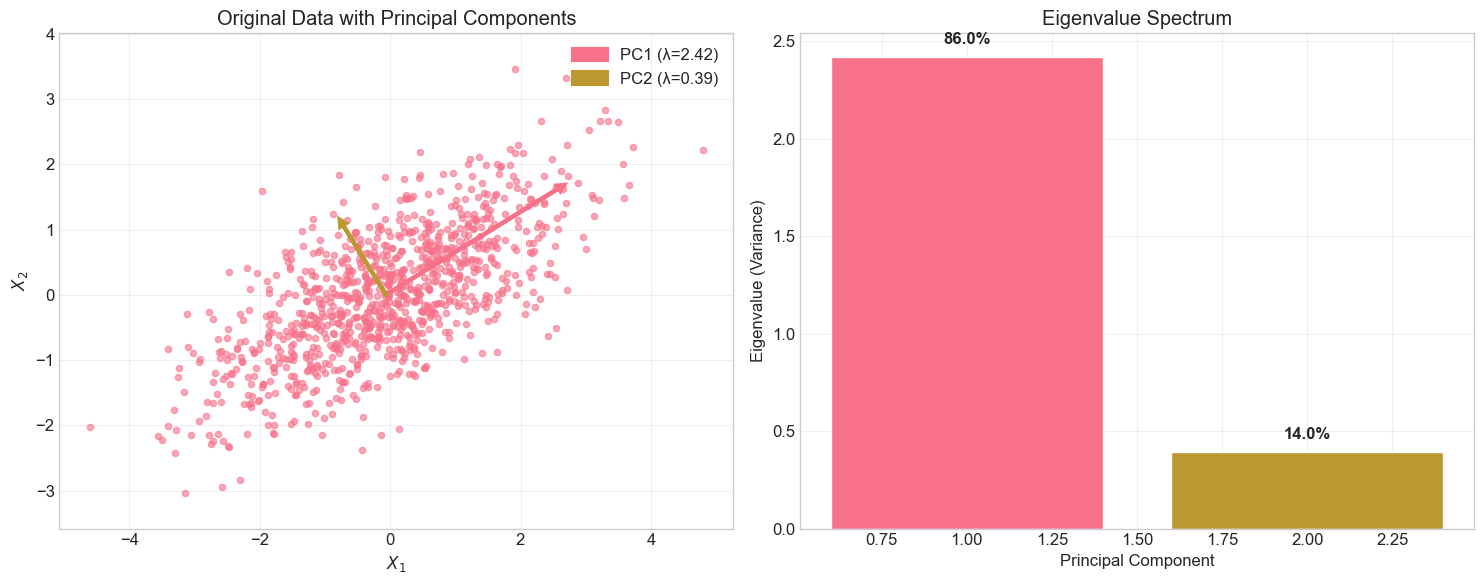

Total variance: 2.814
PC1 explains 86.0% of variance
PC2 explains 14.0% of variance


In [5]:
# Visualize eigen decomposition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Original data with eigenvectors
eigenvals, eigenvecs = np.linalg.eig(sample_cov)
sort_idx = np.argsort(eigenvals)[::-1]
eigenvals = eigenvals[sort_idx]
eigenvecs = eigenvecs[:, sort_idx]

# Plot data points
ax1.scatter(data[:, 0], data[:, 1], alpha=0.6, s=20)

# Plot eigenvectors (scaled by eigenvalues for visualization)
origin = np.mean(data, axis=0)
for i, (val, vec) in enumerate(zip(eigenvals, eigenvecs.T)):
    ax1.arrow(origin[0], origin[1],
              vec[0] * np.sqrt(val) * 2, vec[1] * np.sqrt(val) * 2,
              head_width=0.1, head_length=0.1, fc=f'C{i}', ec=f'C{i}',
              linewidth=3, label=f'PC{i+1} (λ={val:.2f})')

ax1.set_xlabel(r'$X_1$')
ax1.set_ylabel(r'$X_2$')
ax1.set_title('Original Data with Principal Components')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axis('equal')

# Plot 2: Eigenvalue spectrum
ax2.bar(range(1, len(eigenvals) + 1), eigenvals, color=['C0', 'C1'])
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Eigenvalue (Variance)')
ax2.set_title('Eigenvalue Spectrum')
ax2.grid(True, alpha=0.3)

# Add variance explained percentages
total_var = np.sum(eigenvals)
for i, val in enumerate(eigenvals):
    percentage = (val / total_var) * 100
    ax2.text(i + 1, val + 0.05, f'{percentage:.1f}%',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Total variance: {total_var:.3f}")
print(f"PC1 explains {(eigenvals[0]/total_var)*100:.1f}% of variance")
print(f"PC2 explains {(eigenvals[1]/total_var)*100:.1f}% of variance")

## Visual Intuition

### Why Centering Matters - Visual Demonstration

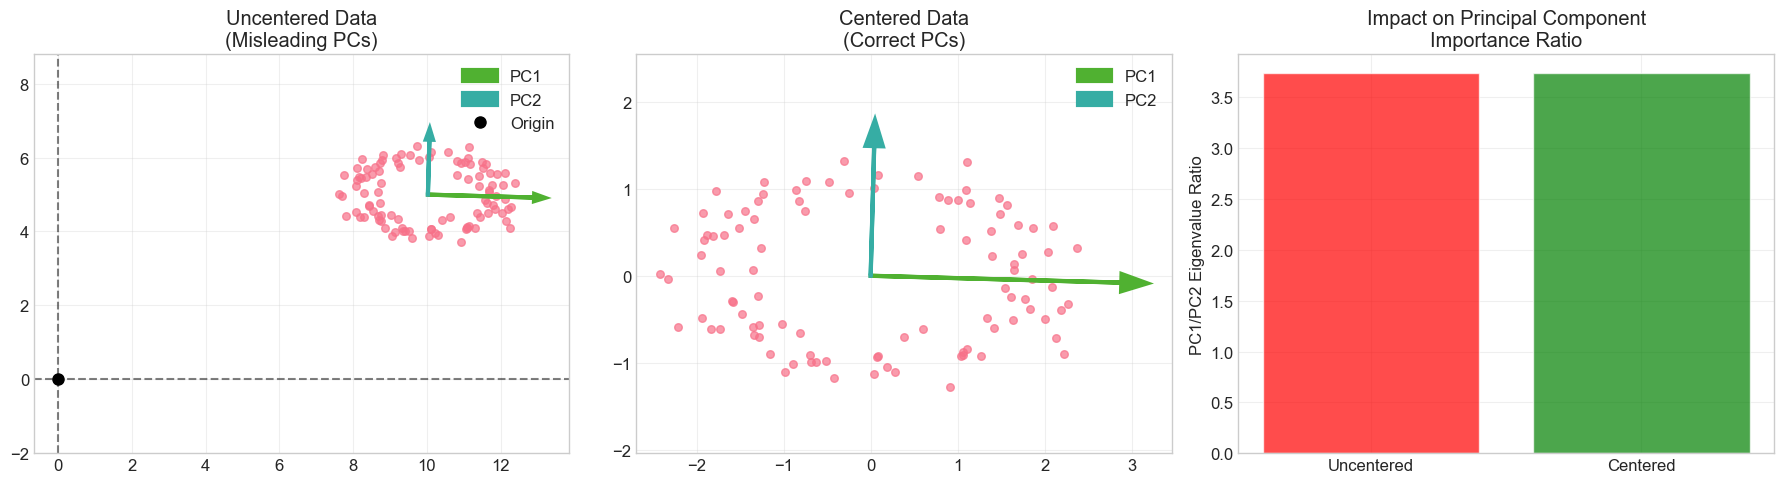

Uncentered data - Eigenvalue ratio (PC1/PC2): 3.74
Centered data - Eigenvalue ratio (PC1/PC2): 3.74

Centering reveals the true variance structure in the data!


In [6]:
# Demonstrate the importance of centering
np.random.seed(123)

# Create data with a clear directional pattern
t = np.linspace(0, 2*np.pi, 100)
x = 2 * np.cos(t) + np.random.normal(0, 0.3, 100)
y = np.sin(t) + np.random.normal(0, 0.2, 100)

# Shift data away from origin
data_shifted = np.column_stack([x + 10, y + 5])
data_centered = data_shifted - np.mean(data_shifted, axis=0)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

def plot_pca_analysis(ax, data, title, show_origin=True):
    # Compute PCA
    cov_matrix = np.cov(data.T)
    eigenvals, eigenvecs = np.linalg.eig(cov_matrix)
    sort_idx = np.argsort(eigenvals)[::-1]
    eigenvals, eigenvecs = eigenvals[sort_idx], eigenvecs[:, sort_idx]

    # Plot data
    ax.scatter(data[:, 0], data[:, 1], alpha=0.7, s=30)

    # Plot principal components
    center = np.mean(data, axis=0)
    for i, (val, vec) in enumerate(zip(eigenvals, eigenvecs.T)):
        scale = np.sqrt(val) * 2
        ax.arrow(center[0], center[1], vec[0] * scale, vec[1] * scale,
                head_width=0.2, head_length=0.3, fc=f'C{i+2}', ec=f'C{i+2}',
                linewidth=3, label=f'PC{i+1}')

    if show_origin:
        ax.axhline(y=0, color='k', linestyle='--', alpha=0.5)
        ax.axvline(x=0, color='k', linestyle='--', alpha=0.5)
        ax.plot(0, 0, 'ko', markersize=8, label='Origin')

    ax.set_title(title)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.axis('equal')
    return eigenvals

# Plot uncentered data
evals1 = plot_pca_analysis(axes[0], data_shifted, 'Uncentered Data\n(Misleading PCs)')

# Plot centered data
evals2 = plot_pca_analysis(axes[1], data_centered, 'Centered Data\n(Correct PCs)', show_origin=False)

# Compare eigenvalue ratios
axes[2].bar(['Uncentered', 'Centered'],
           [evals1[0]/evals1[1], evals2[0]/evals2[1]],
           color=['red', 'green'], alpha=0.7)
axes[2].set_ylabel('PC1/PC2 Eigenvalue Ratio')
axes[2].set_title('Impact on Principal Component\nImportance Ratio')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Uncentered data - Eigenvalue ratio (PC1/PC2):", f"{evals1[0]/evals1[1]:.2f}")
print("Centered data - Eigenvalue ratio (PC1/PC2):", f"{evals2[0]/evals2[1]:.2f}")
print("\nCentering reveals the true variance structure in the data!")

### Component Selection Visualization

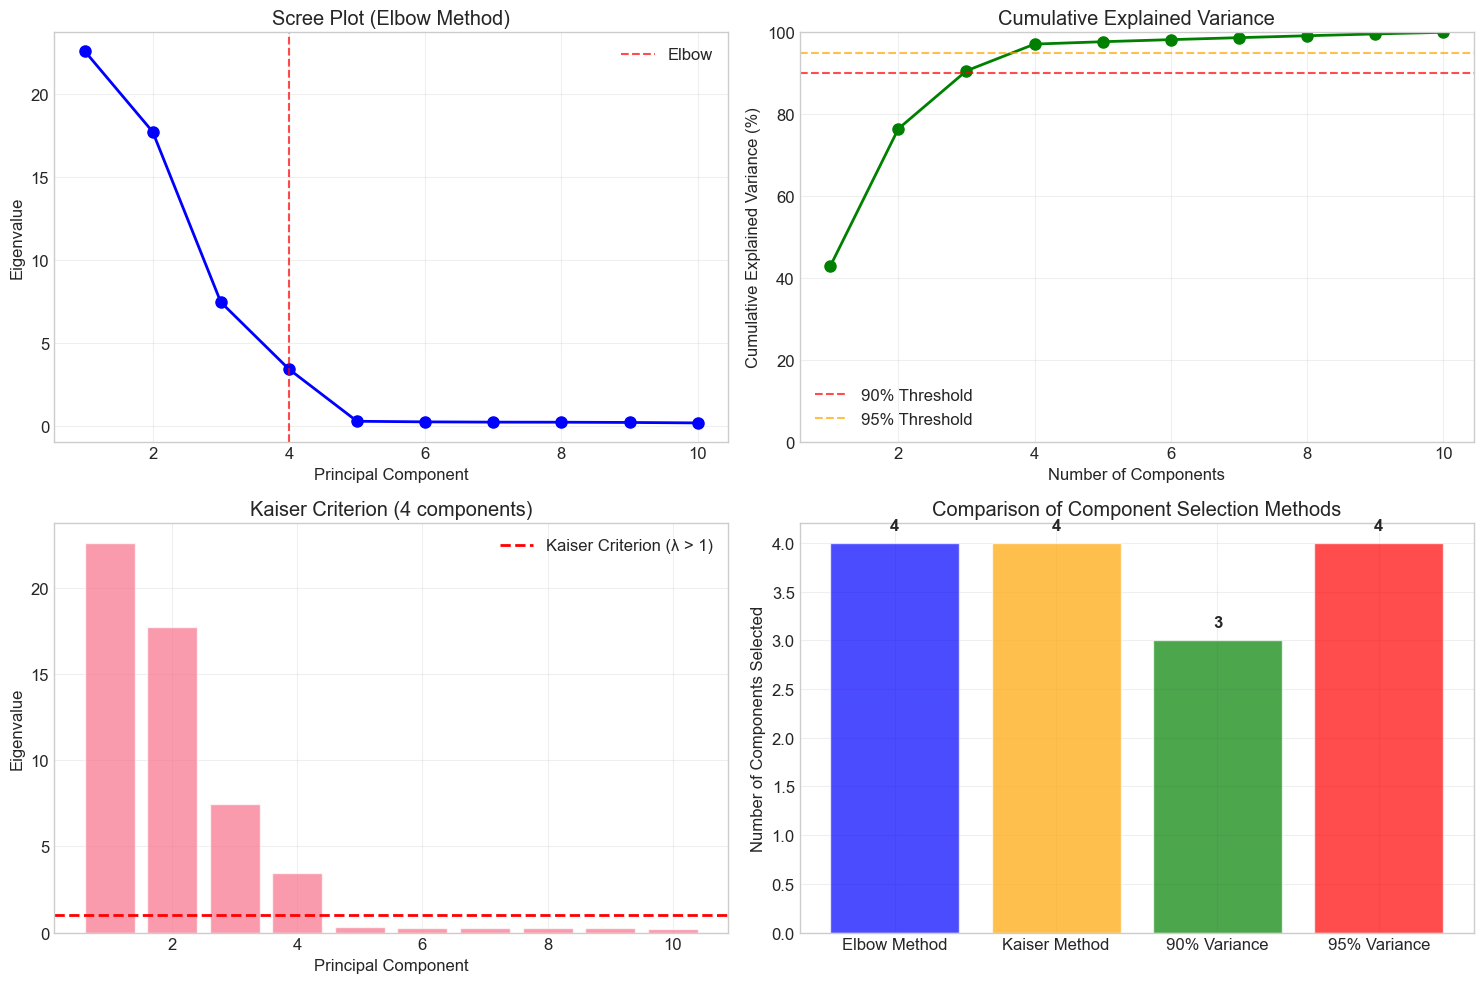

Component Selection Summary:
Elbow Method: 4 components
Kaiser Criterion (λ > 1): 4 components
90% Variance Explained: 3 components (90.6%)
95% Variance Explained: 4 components (97.1%)
Actual underlying structure: 4 components


In [8]:
# Demonstrate different methods for selecting number of components
np.random.seed(42)

# Generate high-dimensional data with known structure
n_samples, n_features = 500, 10
# Create data where the first few components have high variance
true_components = 4
latent_vars = np.random.randn(n_samples, true_components)
loadings = np.random.randn(n_features, true_components)
noise = np.random.randn(n_samples, n_features) * 0.5

X = latent_vars @ loadings.T + noise
X = X - np.mean(X, axis=0)  # Center the data

# Compute PCA
cov_matrix = np.cov(X.T)
eigenvals, eigenvecs = np.linalg.eig(cov_matrix)
eigenvals = np.sort(eigenvals)[::-1]  # Sort in descending order
eigenvals = np.real(eigenvals)  # Remove tiny imaginary parts

# Calculate cumulative explained variance
cumulative_var = np.cumsum(eigenvals) / np.sum(eigenvals)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Scree Plot
axes[0, 0].plot(range(1, len(eigenvals) + 1), eigenvals, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Principal Component')
axes[0, 0].set_ylabel('Eigenvalue')
axes[0, 0].set_title('Scree Plot (Elbow Method)')
axes[0, 0].grid(True, alpha=0.3)

# Add elbow annotation
elbow_point = 4  # Visually determined
axes[0, 0].axvline(x=elbow_point, color='red', linestyle='--', alpha=0.7, label='Elbow')
axes[0, 0].legend()

# 2. Cumulative Explained Variance
axes[0, 1].plot(range(1, len(cumulative_var) + 1), cumulative_var * 100, 'go-', linewidth=2, markersize=8)
axes[0, 1].axhline(y=90, color='red', linestyle='--', alpha=0.7, label='90% Threshold')
axes[0, 1].axhline(y=95, color='orange', linestyle='--', alpha=0.7, label='95% Threshold')
axes[0, 1].set_xlabel('Number of Components')
axes[0, 1].set_ylabel('Cumulative Explained Variance (%)')
axes[0, 1].set_title('Cumulative Explained Variance')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()
axes[0, 1].set_ylim(0, 100)

# Find components needed for 90% and 95% variance
n_90 = np.argmax(cumulative_var >= 0.90) + 1
n_95 = np.argmax(cumulative_var >= 0.95) + 1

# 3. Kaiser Criterion
kaiser_components = np.sum(eigenvals > 1)
axes[1, 0].bar(range(1, len(eigenvals) + 1), eigenvals, alpha=0.7)
axes[1, 0].axhline(y=1, color='red', linestyle='--', linewidth=2, label='Kaiser Criterion (λ > 1)')
axes[1, 0].set_xlabel('Principal Component')
axes[1, 0].set_ylabel('Eigenvalue')
axes[1, 0].set_title(f'Kaiser Criterion ({kaiser_components} components)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Summary of Methods
methods = ['Elbow Method', 'Kaiser Method', '90% Variance', '95% Variance']
components_selected = [elbow_point, kaiser_components, n_90, n_95]
colors = ['blue', 'orange', 'green', 'red']

bars = axes[1, 1].bar(methods, components_selected, color=colors, alpha=0.7)
axes[1, 1].set_ylabel('Number of Components Selected')
axes[1, 1].set_title('Comparison of Component Selection Methods')
axes[1, 1].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, components_selected):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Component Selection Summary:")
print(f"Elbow Method: {elbow_point} components")
print(f"Kaiser Criterion (λ > 1): {kaiser_components} components")
print(f"90% Variance Explained: {n_90} components ({cumulative_var[n_90-1]*100:.1f}%)")
print(f"95% Variance Explained: {n_95} components ({cumulative_var[n_95-1]*100:.1f}%)")
print(f"Actual underlying structure: {true_components} components")